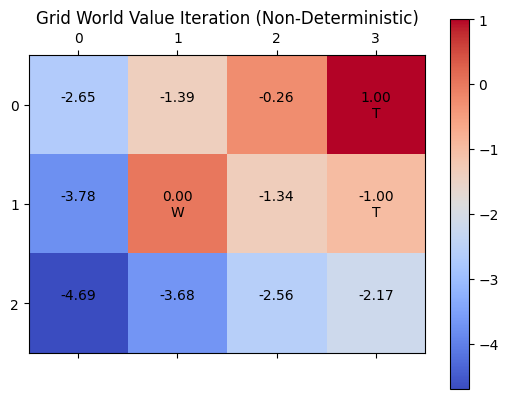

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Environment setup remains the same
shape = (3, 4)
goal = (0, 3)
hole = (1, 3)
wall = (1, 1)
start = (2, 0)
gamma = 1  # Discount factor for future rewards
reward = -0.9  # Constant reward for non-terminal states
actions = [(-1, 0), (1, 0), (0, 1), (0, -1)]  # up, down, right, left
termination_states = [goal, hole]
max_iterations = 1000
theta = 1e-10

utilities = np.zeros(shape)
policy = np.zeros(shape, dtype='<U1')
utilities[goal] = 1
utilities[hole] = -1

def valid_state(state):
    """Check if a state is valid and within the grid bounds."""
    return 0 <= state[0] < shape[0] and 0 <= state[1] < shape[1] and state != wall

def calculate_utilities(state, action):
    """Calculate the utilities of taking an action from a state considering possible deviations."""
    main_state = (state[0] + action[0], state[1] + action[1])
    side1_state = (state[0] + action[1], state[1] + action[0])
    side2_state = (state[0] - action[1], state[1] - action[0])

    # Check if states are valid; revert to original if not
    main_state = main_state if valid_state(main_state) else state
    side1_state = side1_state if valid_state(side1_state) else state
    side2_state = side2_state if valid_state(side2_state) else state

    # Expected utility calculation
    main_utility = utilities[main_state] * 0.8
    side1_utility = utilities[side1_state] * 0.1
    side2_utility = utilities[side2_state] * 0.1
    return main_utility + side1_utility + side2_utility

# Value Iteration
for _ in range(max_iterations):
    delta = 0
    for i in range(shape[0]):
        for j in range(shape[1]):
            if (i, j) in termination_states or (i, j) == wall:
                continue

            action_utilities = [calculate_utilities((i, j), action) for action in actions]
            max_utility = max(action_utilities)
            new_utility = reward + gamma * max_utility
            delta = max(delta, np.abs(utilities[i, j] - new_utility))
            utilities[i, j] = new_utility

    if delta < theta:  # Stopping condition
        break

# Visualization
fig, ax = plt.subplots()
cax = ax.matshow(utilities, cmap=plt.cm.coolwarm)
for i in range(shape[0]):
    for j in range(shape[1]):
        policy_display = 'T' if (i, j) in termination_states else 'W' if (i, j) == wall else policy[i, j]
        ax.text(j, i, f'{utilities[i, j]:.2f}\n{policy_display}', va='center', ha='center')

plt.colorbar(cax)
plt.title('Grid World Value Iteration (Non-Deterministic)')
plt.show()


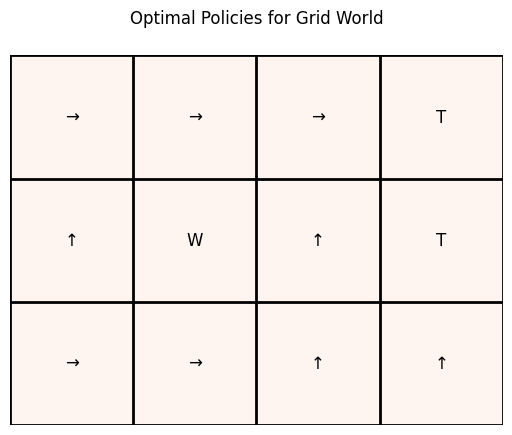

In [9]:

def find_best_action(state):
    """Determine the best action for a given state."""
    if state in termination_states or state == wall:
        return None  # No action needed for terminal states or walls

    best_action = None
    max_expected_utility = float('-inf')

    # Iterate through each action to find the one with the highest expected utility
    for action in actions:
        expected_utility = calculate_utilities(state, action)
        if expected_utility > max_expected_utility:
            max_expected_utility = expected_utility
            best_action = action

    return best_action

# Determine the policy for each state
for i in range(shape[0]):
    for j in range(shape[1]):
        best_action = find_best_action((i, j))
        if best_action == (-1, 0):
            policy[i, j] = 'U'  # Up
        elif best_action == (1, 0):
            policy[i, j] = 'D'  # Down
        elif best_action == (0, 1):
            policy[i, j] = 'R'  # Right
        elif best_action == (0, -1):
            policy[i, j] = 'L'  # Left
        elif (i, j) in termination_states:
            policy[i, j] = 'T'  # Terminal
        elif (i, j) == wall:
            policy[i, j] = 'W'  # Wall

import matplotlib.pyplot as plt


fig, ax = plt.subplots()
cax = ax.matshow(np.zeros(shape), cmap=plt.cm.Reds)


for x in range(shape[1] + 1):
    ax.axvline(x - 0.5, lw=2, color='k', zorder=5)
for y in range(shape[0] + 1):
    ax.axhline(y - 0.5, lw=2, color='k', zorder=5)

for i in range(shape[0]):
    for j in range(shape[1]):
        policy_display = policy[i, j]
        # Display each policy action
        if policy_display == 'U':
            arrow = '↑'
        elif policy_display == 'D':
            arrow = '↓'
        elif policy_display == 'R':
            arrow = '→'
        elif policy_display == 'L':
            arrow = '←'
        elif policy_display == 'T':
            arrow = 'T'  # Terminal state
        elif policy_display == 'W':
            arrow = 'W'  # Wall
        else:
            arrow = ''
        ax.text(j, i, arrow, va='center', ha='center', fontsize=12, color='black')

plt.axis('off')
plt.title('Optimal Policies for Grid World')
plt.show()
